In [1]:
%load_ext nb_black

A requirement for running this notebook is installing the multiparameter persistence computation software RIVET https://github.com/rivetTDA/rivet and the python API for this software https://github.com/rivetTDA/rivet-python

In [1]:
import pandas as pd
import numpy as np
import multiparameter_landscape
import multiparameter_landscape_plotting
import matplotlib.pyplot as plt
import helper_functions
import bokeh
from bokeh.plotting import show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

## Cell point cloud to Bifiltration file and Landscape
We load in ABM simulation point cloud from time point 312. 

In [32]:
time = 312

df = pd.read_csv("C:/Users/Sina Roshandel/sciebo/Code/SpatialPatterningOfImmuneCells/ExampleCellPointclouds/ExampleCellPointclouds/simID45_time{time}_0percentNoise.csv".format(time=time))
X = df[df["PointType"] == "Viable tumour cell"][["x", "y"]].values

We append the sum of the distance to each points 5 nearest neighbours as a codensity function.

In [33]:
df

,x,y,Oxygen,quiescenceThreshold,hypoxiaThreshold,PointType
0,-0.997816,-6.081340,0.265994,0.5,0.3,Necrotic
1,2.053580,0.983591,0.262959,0.5,0.3,Necrotic
2,0.344791,-1.192420,0.263158,0.5,0.3,Necrotic
3,8.266230,-5.442340,0.292730,0.5,0.3,Viable tumour cell
4,0.502242,16.258200,0.569613,0.5,0.3,Viable tumour cell
...,...,...,...,...,...,...
2282,-15.558000,6.793140,0.564734,0.5,0.3,Viable tumour cell
2283,-13.359000,13.321300,0.799496,0.5,0.3,Viable tumour cell
2284,14.968900,-7.629840,0.742992,0.5,0.3,Viable tumour cell
2285,-7.467590,-16.785900,0.841652,0.5,0.3,Viable tumour cell


In [34]:
from scipy.spatial import distance_matrix
from helper_functions import normalise_filter

RipsMax = 40
kNN = 5
D = distance_matrix(X, X)
sortedD = np.sort(D)
codensity = np.sum(sortedD[:, : kNN + 1], axis=1)
filtered_points = np.hstack((X, codensity[:, None]))

We provide functions in `helper_functions.py` to write pointclouds to a text file in the format accepted by rivet to compute multiparameter persistence. The multiparameter persistence landscapes associated to the module can be computed from the output rivet file. The function `Compute_Rivet` writes the pointcloud data to a text file and returns the output of RIVET.

In [35]:
from helper_functions import Compute_Rivet

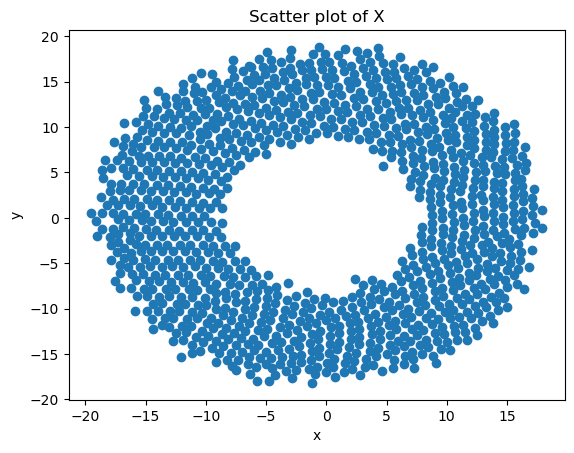

In [36]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of X')
plt.show()

In [38]:
import numpy as np
from one_parameter_classes import Bar, Barcode, Landscape, Landscapes
import rivet

In [42]:
def write_sample(filtered_points, RipsMax, description):
    A = filtered_points
    np.savetxt(description + 'RipsMax' + str(RipsMax) + '.txt', A, fmt='%1.4f',
               header='points \n 2 \n ' + str(RipsMax) + ' \n' + description, comments='')
    filename = description + 'RipsMax' + str(RipsMax) + '.txt'
    return filename

In [47]:
filename='1.txt'

In [51]:
git clone https://bitbucket.org/xoltar/hera
cd hera
git checkout c-api

SyntaxError: invalid syntax (603737540.py, line 1)

In [49]:
from pyrivet import rivet
import numpy as np

ModuleNotFoundError: No module named 'pyrivet'

In [23]:
rivet_output = Compute_Rivet(filtered_points, dim=1, resolution=50, RipsMax=40)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [6]:
from multiparameter_landscape_plotting import plot_multiparameter_landscapes
from multiparameter_landscape import multiparameter_landscape

<IPython.core.display.Javascript object>

The class `multiparameter_landscape` computes the landscape from the output of RIVET.

In [7]:
multi_landscape = multiparameter_landscape(
    rivet_output, maxind=2, grid_step_size=0.4, bounds=[[0, 0], [40, 40]]
)

<IPython.core.display.Javascript object>

The `multi_landscape` object represents it's landscape function as a numpy array of shape:
$$ (\text{max index}, \text{codensity parameter steps},\text{radius parameter steps})$$

The entry `multi_landscape[index,codensity_step,radius_step]` contains the landscape function value:
$$ \lambda(\text{index},
            \text{codensity_lower_bound} +\text{grid_step_size}*\text{codensity_step},
            \text{radius_lower_bound} +\text{grid_step_size}*\text{radius_step} )$$

In [8]:
type(multi_landscape.landscape_matrix)

numpy.ndarray

<IPython.core.display.Javascript object>

In [9]:
multi_landscape.landscape_matrix.shape

(2, 101, 101)

<IPython.core.display.Javascript object>

We can plot the landscape using the function `plot_multiparameter_landscapes`.

In [10]:
landscape_plots = plot_multiparameter_landscapes(multi_landscape, indices=[1, 2])
show(landscape_plots)

<IPython.core.display.Javascript object>

The whole process is packaged in a single function `Rips_Codensity_Bifiltration` together with a visualisation of the filtration accompanying the landscape. This function also linearly rescales the codensity values so that 95% of the codensity values lie in the same range as the radius parameter.

In [11]:
plot = multiparameter_landscape_plotting.Rips_Codensity_Bifiltration(
    points=X, radius_range=[0, 40], maxind=1, dim=1, kNN=5, resolution=50
)
show(plot)

<IPython.core.display.Javascript object>

We load in a pointcloud from the same time step except with noise added.

In [12]:
df = pd.read_csv(f"./ExampleCellPointclouds/simID45_time{time}_1percentNoise.csv")
X = df[np.logical_or(df["PointType"] == "Macrophage", df["PointType"] == "Noise")][
    ["x", "y"]
].values

<IPython.core.display.Javascript object>

In [13]:
plot = multiparameter_landscape_plotting.Rips_Codensity_Bifiltration(
    points=X, radius_range=[0, 40], maxind=1, dim=1, kNN=5, resolution=50
)
show(plot)

<IPython.core.display.Javascript object>

We note that the noise diminishes the landscape function for the larger codensity values in which the noisy points disrupt the loop formed by the macrophage cells.

## Other Bifiltrations

We can easily use filtration parameters other than codensity such as oxygen environment. We rescale linearly the oxygen parameter values to lie in the same range as the radius parameter.

In [42]:
time = 312

df = pd.read_csv(f"./ExampleCellPointclouds/simID45_time{time}_1percentNoise.csv")
X = df[df["PointType"] == "Macrophage"][["x", "y"]].values
oxygen_level = RipsMax * normalise_filter(
    df[df["PointType"] == "Macrophage"]["Oxygen"].values, 5
)
filtered_points = np.hstack((X, oxygen_level[:, None]))

<IPython.core.display.Javascript object>

In [43]:
rivet_output = Compute_Rivet(filtered_points, dim=1, resolution=50, RipsMax=40)

<IPython.core.display.Javascript object>

In [44]:
from multiparameter_landscape_plotting import plot_multiparameter_landscapes
from multiparameter_landscape import multiparameter_landscape

<IPython.core.display.Javascript object>

The class `multiparameter_landscape` computes the landscape from the output of RIVET.

In [45]:
multi_landscape = multiparameter_landscape(
    rivet_output, maxind=2, grid_step_size=0.4, bounds=[[0, 0], [40, 40]]
)

<IPython.core.display.Javascript object>

In [46]:
landscape_plots = plot_multiparameter_landscapes(multi_landscape, indices=[1, 2])
show(landscape_plots)

<IPython.core.display.Javascript object>